# <b>Videogames Analysis</b>

In our online store Ice, we sells video games worldwide. 

We have access to data going back to 2016 on user and expert reviews, genres, platforms (such as Xbox or PlayStation), and historical game sales, all available from open sources. Now, in December 2016, we are planning a campaign for the next year, 2017.

In this study, our goal is to analyze various factors influencing the success of video games. By identifying patterns in these factors, we aim to predict which games are likely to perform well in the market. 

This analysis will help us make informed decisions about which projects to invest in and how to plan our advertising campaigns effectively. Through rigorous examination of the data, we aim to gain insights into the dynamics of the gaming industry and enhance our strategies for promoting and selling video games on Ice.

Formatos de revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Correcto
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones y recomendaciones
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita correcciones
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Respuesta del estudiante
</div>

Let's kick things off by importing the necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

Next, we load the dataset and store it in a variable, ensuring that all column names are converted to lowercase for consistency. 

We'll print a sample of the dataframe and its info to inspect what's in it. In the next section on data preparation, I'll be providing observations alongside the necessary corrections.

In [2]:
url = "https://raw.githubusercontent.com/leobabel/ProyectoIntegrado1/main/games.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.lower()
print(df.head())
print()
print(df.info())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11

## <b>Data Prep<b/>

In this section, we delve into the crucial process of data preparation, which involves several steps aimed at ensuring the dataset is clean, organized, and ready for analysis.

Here, we address any inconsistencies or errors in the data by performing tasks such as handling missing values, correcting data types, and removing (or not) duplicates. This ensures the accuracy and reliability of our analysis.

Throughout this process, we'll be documenting our observations and any changes made to the dataset, ensuring transparency and reproducibility in our analysis.

Ultimately, the goal of data preparation is to transform the raw dataset into a clean, structured format that facilitates meaningful analysis and insights.

Let's begin by checking out the null values.

### Presence of Null Values


The dataframe under analysis contains several columns with null values, indicating missing data in various fields. Here is a summary of the observations:

In [3]:
print(df.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


The presence of these null values suggests gaps in the dataset that could affect the completeness and accuracy of our analysis. 

In particular, the large number of missing values in the 'critic_score', 'user_score', and 'rating' columns may require us to consider strategies for handling these gaps and ensuring robust and reliable results, specially when critic score null values account for 51% of the field's total entries, and user score null values account for 40% of the field's total entries.
 
Let's begin by handilg the 'critic_score' and 'user_score' null values.

### Handling Missing Data in Critic and User Scores for Video Game Analysis

Null values in the critic_score and user_score columns can occur for several reasons:

- Incomplete Data Collection: Not all games receive reviews from critics or users. Niche or limited-release games might lack enough reviews to generate a score.

- Platform-Specific Reviews: Some games are reviewed on certain platforms but not others, leading to missing scores for those unreviewed platforms.

- Low Popularity: Games that are not widely known may not attract enough reviews from critics or users.

- Entry Errors: Mistakes during data entry or issues with data aggregation can result in missing values.

- Changes in Review Systems: Over time, changes in the methods or platforms for collecting reviews can lead to inconsistencies and missing values in the data.

These factors explain why there are missing scores in the critic_score and user_score columns.

What can we do in order to handle these huge amounts of null values?

In this study, we've opted for a <b>linear regression</b> as an imputation method.

A Linear regression is a straightforward and effective method for predicting missing values. It allows us to use the relationship between sales data and review scores to estimate the missing values accurately. This method leverages existing data patterns to make educated guesses about the missing entries.

In a nutshell, we basically applied a trained model to predict the missing critic_score and user_score values and replace the null values with these predictions.

By imputing the missing values with our predictive model, we maintain the integrity of our dataset. This makes our data more reliable for identifying patterns, determining the success factors of games, and planning marketing campaigns. It also helps in making more informed decisions based on a complete set of data.

Before we apply the regression, we'll have to perform a previous step in the 'user_score' column.

### The "user_score" Column

The 'user_score' column aggregates information from online platforms like Metacritic, IGN, Steam, gaming forums, and social media, where users rate and review video games on a scale of 10/10. 

Initially, this column contains 6701 NaN values and 2280 entries marked as <b>'tbd'</b> ('to be determined').

The presence of "tbd" values could be attributed to various factors; they may indicate that the rating for a particular game is pending determination or verification. It might also serve as a placeholder for missing values during data entry or processing. Or maybe some rating platforms use 'tbd' to denote unavailable or pending ratings.

Also, upon inspection, it was found that the data type for this column is currently an object, which won't allow to apply our predictive linear regression model.

In [4]:
print(f"NaN values in user_score: {df['user_score'].isna().sum()}")
print(f"'tbd' values in user_score: {(df['user_score'] == 'tbd').sum()}")
print(f"Type of data in user_score: {(df['user_score'].dtype)}")
print()
print(df['user_score'].sample(5))

NaN values in user_score: 6701
'tbd' values in user_score: 2424
Type of data in user_score: object

10547    NaN
5508     NaN
3706     NaN
11290    7.7
2498     7.6
Name: user_score, dtype: object


So we need to convert it to Float64. However, this conversion is not possible with string values such as 'tbd'.

In light of these considerations, our plan of action for this column is twofold:

- First, we will convert 'tbd' values to NaN, as they essentially represent missing data for the purposes of our analysis.

- Second, we will convert the 'user_score' column from object to float64 to enable our linear regression model.

In [5]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64')

# Verify the changes
print(f"NaN values in user_score AFTER conversions: {df['user_score'].isna().sum()}")
print(f"'tbd' values in user_score AFTER conversions: {(df['user_score'] == 'tbd').sum()}")
print(f"Type of data in user_score AFTER conversions: {(df['user_score'].dtype)}")

NaN values in user_score AFTER conversions: 9125
'tbd' values in user_score AFTER conversions: 0
Type of data in user_score AFTER conversions: float64


Now, both columns critic_score and user_score are ready for imputation.

### Linear Regression Model

In this section, we will address the missing values in our dataset by applying a linear regression model for imputation. Here's how we do it:

In [6]:
# Select the relevant columns for imputation
imputation_data = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']]

# Drop rows with missing values for features used for imputation
imputation_data = imputation_data.dropna(subset=['critic_score', 'user_score'])

# Separate features and target variable for imputation
X = imputation_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
y = imputation_data['critic_score']

# Fit a linear regression model to predict critic_score
model = LinearRegression()
model.fit(X, y)

# Use the model to impute missing critic_score values
missing_critic_score = df[df['critic_score'].isnull()][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
imputed_critic_score = model.predict(missing_critic_score)

# Update dataframe with imputed values
df.loc[df['critic_score'].isnull(), 'critic_score'] = imputed_critic_score

# Repeat the process for user_score
y = imputation_data['user_score']
model.fit(X, y)
missing_user_score = df[df['user_score'].isnull()][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
imputed_user_score = model.predict(missing_user_score)
df.loc[df['user_score'].isnull(), 'user_score'] = imputed_user_score

This code performs the following steps:

- Selects relevant columns for imputation.
- Drops rows with missing values for features used for imputation.
- Fits a linear regression model to predict the missing critic_score based on other sales features.
- Imputes missing critic_score values using the fitted model.
- Updates the dataframe with imputed critic_score values.
- Repeats the process for user_score.

... And Voila!, no more NaN values. We've successfully imputed missing values with REAL numbers:

In [7]:
print(f"NaN values in critic_score AFTER Linear Regression: {df['critic_score'].isna().sum()}")
print(f"NaN values in user_score AFTER Linear Regression: {df['user_score'].isna().sum()}")
print()
print('Sample:')
print(df[['critic_score','user_score']].sample(10))

NaN values in critic_score AFTER Linear Regression: 0
NaN values in user_score AFTER Linear Regression: 0

Sample:
       critic_score  user_score
8295      64.000000    5.000000
5838      81.000000    6.600000
14900     68.957594    7.129790
3855      52.000000    7.160468
937       70.000000    7.400000
12027     69.079653    7.138979
4313      69.000000    7.300000
13982     68.982006    1.600000
73        88.000000    8.700000
13478     68.928375    7.116523


<b>DISCLAIMER</b>

While our imputation process aims to fill in missing values accurately, it's important to verify the results to ensure the imputed data is reasonable. Here are some steps to follow:

- Inspection of the Imputed Columns: Check the 'critic_score' and 'user_score' columns to confirm that missing values have been replaced with plausible estimates. Look for any patterns or anomalies in the imputed values.

- Evaluation of the Distribution: Ensure that the imputed values align with the overall distribution of the respective columns, maintaining the natural variability of the data.

- Checking for Outliers: Identify any outliers in the imputed values that might indicate potential issues with the imputation process.

Although these activities can be performed at a later time, it's crucial to maintain transparency and traceability in your data preprocessing steps.

### Deletion of 'name', 'genre' and 'year_of_release' null values

In the 'year_of_release' column, we have the presence of 269 null values.

Let's visualize the null values in the 'name' column. Interestingly, we notice that these two indexes (659 and 1422) also exhibit null values in the 'genre' column.

In [8]:
print(df[df['name'].isnull()])
print('_'*75)
print(df[df['genre'].isnull()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08     73.660842    7.325559    NaN  
14244         0.00     68.969138    7.145781    NaN  
___________________________________________________________________________
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08     73.660842    7.325559    NaN  
14244         0.00     68.969138    7.145781    NaN  


There are several plausible explanations for the presence of NaN (Not a Number) values in the 'year_of_release', 'name', and 'genre' columns:

- Data Entry Errors: Errors during data entry or oversight during data collection could have resulted in incomplete or missing information.

- Inconsistencies in Data Sources: If the dataset amalgamated data from various sources, disparities or missing data in these sources might have contributed to NaN values.

- Missing Data: Information regarding release years might have been absent from the dataset due to data collection oversights or unavailability.

- Unknown Release Years: For certain games, especially older or less prominent ones, precise release year information might not be readily accessible or well-documented.

- Data Corruption or Errors: Errors or corruption during data processing, storage, or transfer could have introduced NaN values.

Given these considerations, we opt to remove these entries, which constitute a mere 1.63% of the total records. Consequently, their exclusion will have minimal impact on the overall analysis.

In [9]:
# Alright, go away, mf'ers
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

### Date format change

Let's change 'year_of_release' data type from float64 to something more useful.

In [10]:
# Convert 'year_of_release' to datetime keeping only the year
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce').dt.year
print(f"Type of data in year_of_release AFTER conversion: {(df['year_of_release'].dtype)}")


Type of data in year_of_release AFTER conversion: int64


### The 'rating' column

The dataframe includes a "rating" column that stores the ESRB rating of each game. The <b>Entertainment Software Rating Board</b> evaluates the content of a game and assigns an age rating which goes from 'E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', and 'RP'.

The field also presents 6766 NaN values.

The presence of these NaN values could stem from several reasons:

- Missing Data Entry: Oversight or human error during data collection or entry processes might have led to the absence of rating information for certain entries.

- Unavailable Ratings: Particularly for older or niche games, official ratings may not have been provided by relevant rating authorities such as ESRB or PEGI, resulting in missing values.

- Incomplete Dataset: Data sourcing from multiple origins or an incomplete dataset might contribute to information gaps for specific entries.

- Data Privacy or Confidentiality: In some instances, rating details could have been intentionally excluded to adhere to data privacy regulations or safeguard sensitive information.

Given these considerations, it's crucial to understand the dataframe context and the nature of missing values before deciding on the best course of action.

Proposed Approach:

Replacing NaN values with "Undefined" in the 'rating' column offers a pragmatic solution. This preserves data integrity while clearly indicating that a rating was not provided for those entries. This approach aids subsequent analysis or visualization tasks by distinguishing between missing and explicitly unspecified values, which can be pivotal in drawing accurate insights from the dataset.

In [11]:
df['rating'] = df['rating'].fillna('Undefined')
print(df['rating'].sample(10))

9604             E
15705    Undefined
13330    Undefined
8068             E
8323     Undefined
5750     Undefined
433              M
5106             T
11022            M
4670     Undefined
Name: rating, dtype: object


To gain familiarity with the dataset and understand the distribution of ratings, let's examine the unique values present in the 'rating' column and calculate their percentages relative to the total number of entries. This will provide insights into the diversity of ratings assigned to the titles in our dataset.

In [12]:
# Get the unique values in the 'rating' column
unique_ratings = df['rating'].unique()

# Get the total number of records in the DataFrame
total_records = len(df)

# Iterate over each unique rating
for rating in unique_ratings:
    # Count the number of records with the current rating
    rating_count = df[df['rating'] == rating].shape[0]
    
    # Calculate the percentage of records they represent
    percentage = (rating_count / total_records) * 100
    
    # Print the rating, the number of entries, and the percentage
    print(f"Rating: {rating} | Entries: {rating_count} | Percentage: {percentage:.2f}%")


Rating: E | Entries: 3921 | Percentage: 23.84%
Rating: Undefined | Entries: 6676 | Percentage: 40.60%
Rating: M | Entries: 1536 | Percentage: 9.34%
Rating: T | Entries: 2905 | Percentage: 17.67%
Rating: E10+ | Entries: 1393 | Percentage: 8.47%
Rating: K-A | Entries: 3 | Percentage: 0.02%
Rating: AO | Entries: 1 | Percentage: 0.01%
Rating: EC | Entries: 8 | Percentage: 0.05%
Rating: RP | Entries: 1 | Percentage: 0.01%


Alright, so, these ratings correspond to the ESRB (Entertainment Software Rating Board) ratings for video games. Here's what each rating means:

- <b>E (Everyone):</b> Suitable for all ages. Content is generally suitable for all ages. May contain minimal cartoon, fantasy, or mild violence and/or infrequent use of mild language.

- <b>EC (Early Childhood):</b> Suitable for young children. Content is intended for young children and contains no material that parents would find inappropriate.

- <b>E10+ (Everyone 10 and older):</b> Suitable for ages 10 and older. Content is generally suitable for ages 10 and up. May contain more cartoon, fantasy, or mild violence, mild language, and/or minimal suggestive themes.

- <b>K-A (Kids to Adults):</b> An early rating used by the ESRB before 1998, which was replaced by the "E" rating. Suitable for ages 6 and older.

- <b>T (Teen):</b> Suitable for ages 13 and older. Content may include violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.

- <b>M (Mature):</b> Suitable for ages 17 and older. May contain intense violence, blood and gore, sexual content, and/or strong language.

- <b>AO (Adults Only):</b> Suitable only for adults ages 18 and older. May include prolonged scenes of intense violence, graphic sexual content, and/or gambling with real currency.

- <b>RP (Rating Pending):</b> This is a placeholder used for games that have been submitted to the ESRB and are awaiting a final rating.

These ratings help consumers, especially parents, make informed choices about the video games they purchase.

### Null values final result

So, we finally have a dataframe free of null values:

In [13]:
# Calculate the percentage of NaN values for each column
nan_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print("Percentage of NaN values for each column:")
print(nan_percentage)


Percentage of NaN values for each column:
name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64


### Total Sales

To provide a comprehensive view of each game's total sales across all regions, we are going to calculate the total sales by summing the sales figures from the 'na_sales' (North America), 'eu_sales' (Europe), 'jp_sales' (Japan), and 'other_sales' (other regions) columns, then place these sums in a new 'total_sales' column immediately after the 'other_sales' column for better readability and organization.

This step ensures that we have a single column reflecting the combined sales data, which simplifies the analysis and helps in understanding the overall performance of each game across all regions.

In [14]:
# Sum sales from 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Insert the new column 'total_sales' after 'other_sales'
other_sales_index = df.columns.get_loc('other_sales')
df.insert(other_sales_index + 1, 'total_sales', df.pop('total_sales'))

# Display the modified dataframe
print(df.sample(5))


                              name platform  year_of_release     genre  \
2467        ESPN College Hoops 2K5      PS2             2004    Sports   
8295  Looney Tunes: Back in Action       GC             2003  Platform   
8633                 Mr. Driller 2      GBA             2001    Puzzle   
3924                      The BIGS      PS2             2007    Sports   
9910                     Raiden IV     X360             2008   Shooter   

      na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
2467      0.41      0.32      0.00         0.11         0.84          86.0   
8295      0.13      0.03      0.00         0.00         0.16          64.0   
8633      0.00      0.00      0.15         0.00         0.15          62.0   
3924      0.25      0.19      0.00         0.06         0.50          71.0   
9910      0.10      0.00      0.01         0.01         0.12          63.0   

      user_score rating  
2467     8.10000      E  
8295     5.00000      E  
8633    

### The Duplicates case

In our dataframe, we've identified a substantial number of duplicates in the 'name' column, totaling 5018 instances. These duplicates arise due to various factors inherent to the gaming industry and dataset compilation processes.

Firstly, duplicates often occur when a single game title is released across multiple platforms. For instance, "Super Mario Bros." appears twice, once for the NES platform and again for the DS platform. Similarly, "Grand Theft Auto V" is present across PS3, X360, and PS4 platforms. These duplicates reflect the widespread practice of developers releasing games for different gaming consoles or platforms to reach a broader audience.

Furthermore, re-releases and remastered editions contribute to the presence of duplicates. Games may undergo re-releases on newer platforms or receive updated versions with enhanced features or graphics, resulting in multiple entries for the same title.

Despite the prevalence of duplicates, we've chosen to leave them untouched for several reasons. Firstly, these duplicates provide valuable insights into the popularity and longevity of certain game titles across different platforms over time. Analyzing the sales, ratings, and user reception of these duplicates can offer a comprehensive understanding of their impact on the gaming market.

Moreover, removing duplicates indiscriminately could lead to the loss of crucial information and skew our analysis results. Each entry for a duplicate title may contain unique sales figures, user ratings, or critic scores, all of which contribute to our understanding of the game's performance and reception.

Therefore, by retaining these duplicates and treating them as distinct entries, we ensure that our analysis remains comprehensive and reflective of the diverse landscape of the gaming industry.

In [15]:
# Count the number of duplicates in the 'name' column
duplicate_count = df.duplicated(subset=['name']).sum()
print("Number of duplicates in the 'name' column:", duplicate_count)

# Show a sample of the duplicate entries in the 'name' column with only 'name' and 'platform' columns
duplicate_samples = df[df.duplicated(subset=['name'], keep=False)]
print("\nSample of duplicate entries in the 'name' column:")
print(duplicate_samples.head(60))

Number of duplicates in the 'name' column: 5018

Sample of duplicate entries in the 'name' column:
                                       name platform  year_of_release  \
1                         Super Mario Bros.      NES             1985   
5                                    Tetris       GB             1989   
16                       Grand Theft Auto V      PS3             2013   
17            Grand Theft Auto: San Andreas      PS2             2004   
18                        Super Mario World     SNES             1990   
22                      Super Mario Bros. 3      NES             1988   
23                       Grand Theft Auto V     X360             2013   
24              Grand Theft Auto: Vice City      PS2             2002   
29           Call of Duty: Modern Warfare 3     X360             2011   
31                Call of Duty: Black Ops 3      PS4             2015   
32                  Call of Duty: Black Ops     X360             2010   
34               Call of 

### Miscellaneous data prep

Next, we will perform several calculations to better understand the data contained in this dataframe. These steps will help us gain deeper insights and ensure the data is well-prepared for analysis.

First, we will examine the number of different platforms represented in this dataframe. This step will give us an understanding of the diversity and range of platforms included in the dataset, which is crucial for comprehensive analysis.

In [16]:
# Get unique values in the 'platform' column
unique_platforms = df['platform'].unique()
for platform in unique_platforms:
    print(platform)
print()
# Count the number of unique platforms
num_unique_platforms = df['platform'].nunique()
print(f"Number of platforms: {num_unique_platforms}")


Wii
NES
GB
DS
X360
PS3
PS2
SNES
GBA
PS4
3DS
N64
PS
XB
PC
2600
PSP
XOne
WiiU
GC
GEN
DC
PSV
SAT
SCD
WS
NG
TG16
3DO
GG
PCFX

Number of platforms: 31


Next, we will identify the number of unique genres in the dataframe and list all the genres included. This analysis will provide insight into the variety of game genres represented, which is essential for understanding the breadth of the dataset.

In [37]:
# Get unique values in the 'genre' column
unique_genres = df['genre'].unique()

# Create a dictionary to store the counts of each genre
genre_counts = {}

# Count the total number of records
total_records = len(df)

# Iterate over each unique genre and count the number of records
for genre in unique_genres:
    genre_count = df[df['genre'] == genre].shape[0]
    genre_counts[genre] = genre_count

# Sort genres by count in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Print genres, their counts, and percentages in descending order
for genre, count in sorted_genres:
    percentage = (count / total_records) * 100
    print(f"Genre: {genre} | Entries: {count} | Percentage: {percentage:.2f}%")

# Count the number of unique genres
num_unique_genres = df['genre'].nunique()
print(f"\nNumber of genres: {num_unique_genres}")

Genre: Action | Entries: 3307 | Percentage: 20.11%
Genre: Sports | Entries: 2306 | Percentage: 14.02%
Genre: Misc | Entries: 1721 | Percentage: 10.47%
Genre: Role-Playing | Entries: 1481 | Percentage: 9.01%
Genre: Shooter | Entries: 1296 | Percentage: 7.88%
Genre: Adventure | Entries: 1293 | Percentage: 7.86%
Genre: Racing | Entries: 1226 | Percentage: 7.46%
Genre: Platform | Entries: 878 | Percentage: 5.34%
Genre: Simulation | Entries: 857 | Percentage: 5.21%
Genre: Fighting | Entries: 837 | Percentage: 5.09%
Genre: Strategy | Entries: 673 | Percentage: 4.09%
Genre: Puzzle | Entries: 569 | Percentage: 3.46%

Number of genres: 12


### Critic Score Statistics

We are now delving into the statistical analysis of the 'critic_score' column to understand its distribution and central tendencies. By calculating key metrics such as the minimum, maximum, average, median, standard deviation, and quartiles, we can gain insights into the overall quality ratings of the games. Additionally, identifying the games with the lowest and highest critic scores provides specific examples of how games are perceived by critics. This analysis helps us comprehend the variability and central trends within the critic scores.

In [19]:
# Calculate statistics for 'critic_score'
min_cs = df['critic_score'].min()
max_cs = df['critic_score'].max()
average_cs = df['critic_score'].mean()
median_cs = df['critic_score'].median()
std_dev_cs = df['critic_score'].std()
q1_cs = df['critic_score'].quantile(0.25)
q3_cs = df['critic_score'].quantile(0.75)
count_cs = df['critic_score'].count()
mode_cs = df['critic_score'].mode()[0] if not df['critic_score'].mode().empty else 'No mode'

# Get the games with the lowest and highest critic scores
game_with_lowest_cs = df.loc[df['critic_score'].idxmin()]
game_with_highest_cs = df.loc[df['critic_score'].idxmax()]

# Print results
print(f"The game with the lowest critic score:\n{game_with_lowest_cs}\n")
print(f"The game with the highest critic score:\n{game_with_highest_cs}\n")
print(f"Minimum critic score: {min_cs}")
print(f"Maximum critic score: {max_cs}")
print(f"Average critic score: {average_cs:.2f}")
print(f"Median critic score: {median_cs}")
print(f"Standard deviation of critic scores: {std_dev_cs:.2f}")
print(f"25th percentile (Q1) of critic scores: {q1_cs}")
print(f"75th percentile (Q3) of critic scores: {q3_cs}")
print(f"Count of non-null critic scores: {count_cs}")
print(f"Mode of critic scores: {mode_cs}")

The game with the lowest critic score:
name               Ride to Hell
platform                    PS3
year_of_release            2013
genre                    Racing
na_sales                   0.02
eu_sales                   0.01
jp_sales                    0.0
other_sales                0.01
total_sales                0.04
critic_score               13.0
user_score                  1.0
rating                        M
Name: 13689, dtype: object

The game with the highest critic score:
name               Super Mario Bros.
platform                         NES
year_of_release                 1985
genre                       Platform
na_sales                       29.08
eu_sales                        3.58
jp_sales                        6.81
other_sales                     0.77
total_sales                    40.24
critic_score               156.77129
user_score                 16.070687
rating                     Undefined
Name: 1, dtype: object

Minimum critic score: 13.0
Maximum critic

### User Score Statistics

Next, we are analyzing the 'user_score' column to understand how users rate the games. We calculate key statistical metrics such as the minimum, maximum, average, median, standard deviation, and quartiles to capture the distribution and central tendencies of user scores. By identifying the games with the lowest and highest user scores, we gain insights into the range of user ratings. This analysis helps us understand how user ratings compare to critic scores and provides a comprehensive view of the game's reception among the general audience.

In [20]:
# Calculate statistics for 'user_score'
min_us = df['user_score'].min()
max_us = df['user_score'].max()
average_us = df['user_score'].mean()
median_us = df['user_score'].median()
std_dev_us = df['user_score'].std()
q1_us = df['user_score'].quantile(0.25)
q3_us = df['user_score'].quantile(0.75)
count_us = df['user_score'].count()
mode_us = df['user_score'].mode()[0] if not df['user_score'].mode().empty else 'No mode'

# Get the games with the lowest and highest critic scores
game_with_lowest_us = df.loc[df['user_score'].idxmin()]
game_with_highest_us = df.loc[df['user_score'].idxmax()]

# Print results
print(f"The game with the lowest user score:\n{game_with_lowest_us}\n")
print(f"The game with the highest user score:\n{game_with_highest_us}\n")
print(f"Minimum user score: {min_us}")
print(f"Maximum user score: {max_us}")
print(f"Average user score: {average_us:.2f}")
print(f"Median user score: {median_us}")
print(f"Standard deviation of user score: {std_dev_us:.2f}")
print(f"25th percentile (Q1) of user score: {q1_us}")
print(f"75th percentile (Q3) of user score: {q3_us}")
print(f"Count of non-null user score: {count_us}")
print(f"Mode of user score: {mode_us}")

The game with the lowest user score:
name               My Little Pony: Pinkie Pie's Party
platform                                           DS
year_of_release                                  2008
genre                                       Adventure
na_sales                                         0.66
eu_sales                                          0.0
jp_sales                                          0.0
other_sales                                      0.06
total_sales                                      0.72
critic_score                                70.630201
user_score                                        0.0
rating                                              E
Name: 2835, dtype: object

The game with the highest user score:
name               Super Mario Bros.
platform                         NES
year_of_release                 1985
genre                       Platform
na_sales                       29.08
eu_sales                        3.58
jp_sales                    

### Preliminary Observations

The dataset encompasses a significant timeframe from 1980 to 2016, offering insights into 31 distinct gaming platforms and 12 diverse genres. Notably, Action games dominate the dataset, representing 20.11% of entries, followed closely by Sports games at 14.02%.

It's important to note there was a substantial presence of missing values in critical areas, including critic score (51.45%), user score (54.62%), and rating (40.60%). We've opted to apply a linear regression model to the 'critic_score' and 'user_score' fields in order to handle these values, and to mark as "Undefined" to those in the 'rating' column.

Additionally, the Wii platform emerges as the most prevalent, while "Wii Sports" (Wii, 2006, Sports) achieves remarkable success, boasting the highest total sales of 82.54 million units. Truly remarkable findings.

In [21]:
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
sales_statistics = df[sales_columns].describe()
print(sales_statistics)


           na_sales      eu_sales      jp_sales   other_sales   total_sales
count  16444.000000  16444.000000  16444.000000  16444.000000  16444.000000
mean       0.264012      0.145930      0.078487      0.047594      0.536023
std        0.818378      0.506716      0.311100      0.188005      1.558786
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.030000      0.470000
max       41.360000     28.960000     10.220000     10.570000     82.540000


Moreover, delving into sales data reveals intriguing patterns. The dataset's sales figures, including North America (NA), Europe (EU), Japan (JP), and other regions, showcase a comprehensive view of the gaming market. Notably, the mean total sales stand at 0.536 million units, with considerable variations indicated by the standard deviations.

Across regions, North America boasts the highest mean sales at 0.264 million units, followed by Europe at 0.146 million units and Japan at 0.078 million units. Other regions contribute modestly, with a mean of 0.048 million units.

Examining quartiles, 75% of games have total sales below 0.47 million units, while the maximum recorded total sales reach an impressive 82.54 million units, showcasing remarkable outliers in the market.

## <b>Analysis</b>

In this section, we'll explore the distribution of data through descriptive statistics and visualizations. This step helps us gain insights into the dataset's characteristics, such as central tendency, variability, and distribution of values across different variables.

Additionally, we consider encoding categorical variables and handling outliers to prevent them from skewing our analysis or modeling results.

### Analyze the number of games released each year. 

Is the data for each period significant?

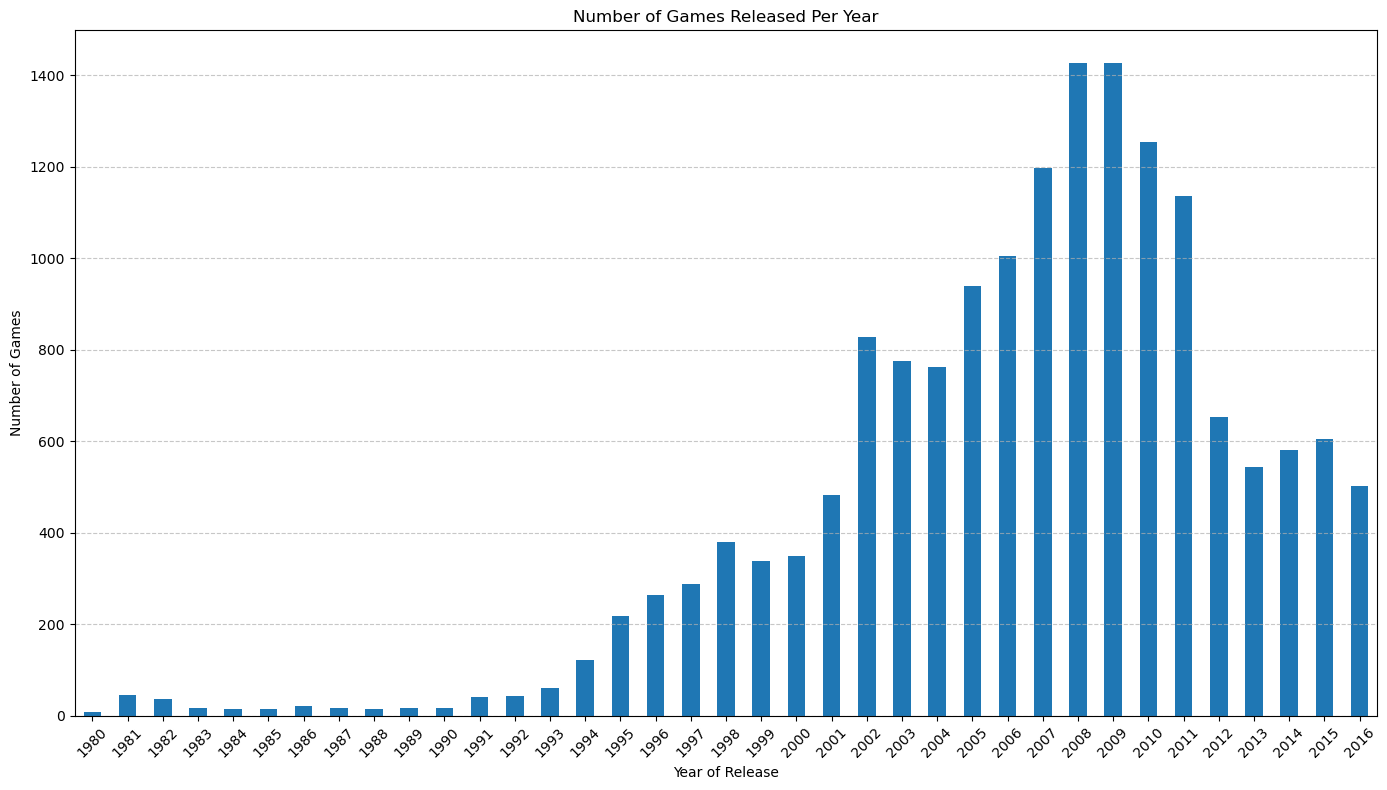

In [22]:
import matplotlib.pyplot as plt

# Remove NaN values in the 'year_of_release' column to focus on valid years
df_valid_years = df.dropna(subset=['year_of_release'])

# Create the bar plot
plt.figure(figsize=(14, 8))
df_valid_years['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The data on the number of games released per year reveals significant trends and shifts within the video game industry. In the early years (1980-1990), the industry was in its infancy, with a relatively low number of game releases. This period saw steady but modest growth, reflecting the nascent stages of gaming technology and market development. Moving into the 1990s and early 2000s, there was a noticeable increase in game releases, corresponding with the rise of advanced gaming consoles and the expansion of the gaming market.

The peak period from 2001 to 2010 highlights a substantial boom in game releases, particularly around 2008 and 2009. This era, dominated by consoles like the PlayStation 2, Xbox 360, and Nintendo Wii, saw extensive game libraries and significant market growth. In recent years (2011-2016), there has been a slight decline in the number of releases, which could be attributed to market saturation, the rise of mobile gaming, and industry shifts towards digital distribution and indie games. Overall, the data for each period is significant as it reflects the evolution of the video game industry, providing valuable insights into market dynamics, technological advancements, and consumer preferences.

### Analyzing Platform Sales Trends and Lifecycle Durations

Let's observe how sales vary from one platform to another. 

This is done by identify the platforms with the highest total sales and distributions based on yearly data. 

We will look for platforms that used to be popular but now have no sales, so we can ask ourselves; How long do new platforms typically take to emerge? and how long do older platforms take to phase out?

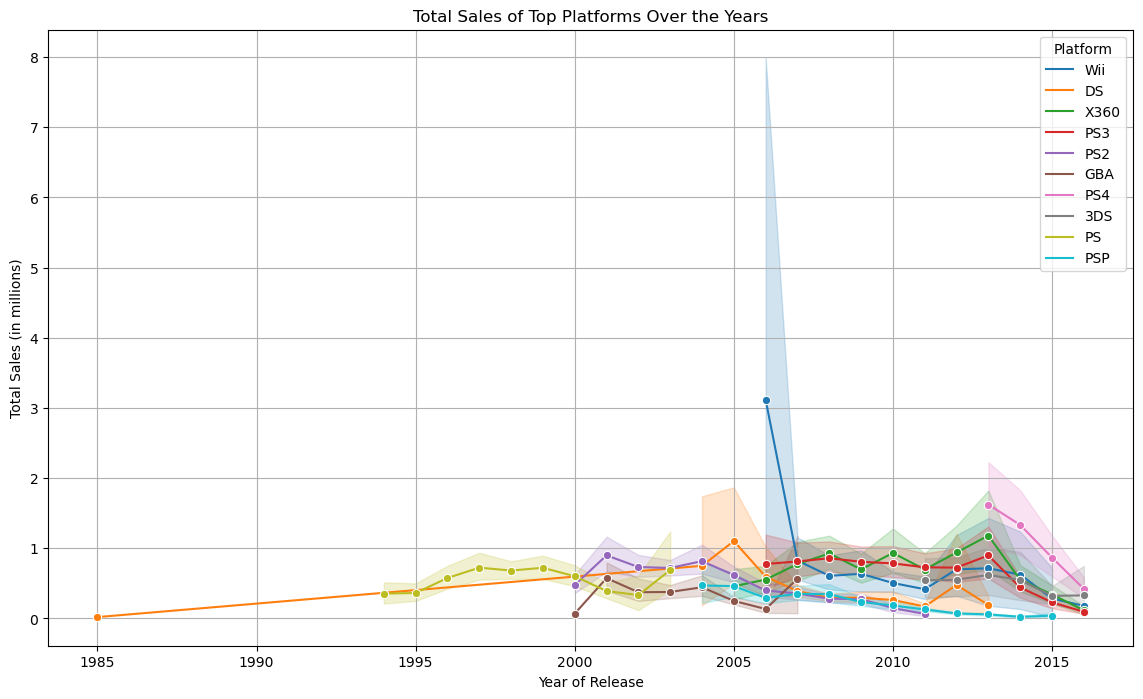

Lifecycle duration (in years) for each platform:
PS2: 11 years
X360: 11 years
PS3: 10 years
Wii: 10 years
DS: 28 years
PS: 9 years
PS4: 3 years
GBA: 7 years
PSP: 11 years
3DS: 5 years

Emergence and phase-out times for top platforms:
PS2: Emerged in 2000, Phased out in 2011
X360: Emerged in 2005, Phased out in 2016
PS3: Emerged in 2006, Phased out in 2016
Wii: Emerged in 2006, Phased out in 2016
DS: Emerged in 1985, Phased out in 2013
PS: Emerged in 1994, Phased out in 2003
PS4: Emerged in 2013, Phased out in 2016
GBA: Emerged in 2000, Phased out in 2007
PSP: Emerged in 2004, Phased out in 2015
3DS: Emerged in 2011, Phased out in 2016


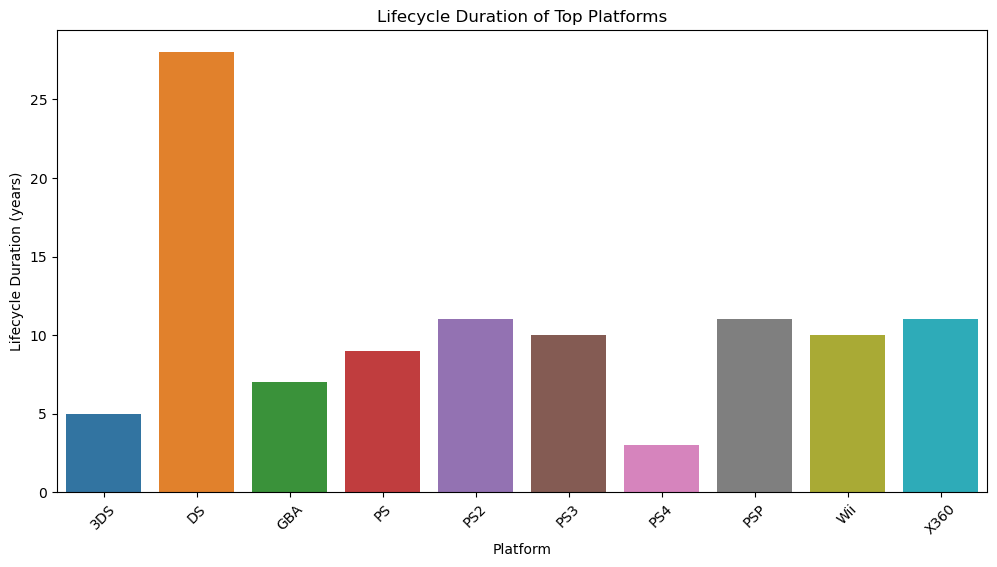

In [43]:
# Calculate total sales for each platform
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Select the top platforms with the highest total sales
top_platforms = platform_sales.head(10).index

# Filter the dataset for only the top platforms
top_platforms_data = df[df['platform'].isin(top_platforms)]

# Plot the sales distribution for top platforms over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_platforms_data, x='year_of_release', y='total_sales', hue='platform', marker='o')

# Title and labels
plt.title('Total Sales of Top Platforms Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

# Identify platforms that used to be popular but now have no sales
sales_by_year_platform = df.pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum', fill_value=0)
platform_lifecycles = (sales_by_year_platform != 0).astype(int).sum(axis=0)

# Identify the lifecycle duration for each platform
lifecycle_duration = {}
for platform in sales_by_year_platform.columns:
    active_years = sales_by_year_platform[platform][sales_by_year_platform[platform] != 0].index
    if not active_years.empty:
        lifecycle_duration[platform] = (active_years.max() - active_years.min()).astype(int)
    else:
        lifecycle_duration[platform] = 0

# Display lifecycle durations for top platforms
print("Lifecycle duration (in years) for each platform:")
for platform in top_platforms:
    print(f"{platform}: {lifecycle_duration[platform]} years")

# Analyze the emergence and phase-out times for platforms
emergence_times = {}
phase_out_times = {}
for platform in top_platforms:
    active_years = sales_by_year_platform[platform][sales_by_year_platform[platform] != 0].index
    if not active_years.empty:
        emergence_times[platform] = active_years.min()
        phase_out_times[platform] = active_years.max()

print("\nEmergence and phase-out times for top platforms:")
for platform in top_platforms:
    print(f"{platform}: Emerged in {emergence_times[platform]}, Phased out in {phase_out_times[platform]}")

# Visualize lifecycle durations
lifecycle_df = pd.DataFrame(list(lifecycle_duration.items()), columns=['Platform', 'Lifecycle Duration'])
lifecycle_df = lifecycle_df[lifecycle_df['Platform'].isin(top_platforms)]

plt.figure(figsize=(12, 6))
sns.barplot(data=lifecycle_df, x='Platform', y='Lifecycle Duration')
plt.title('Lifecycle Duration of Top Platforms')
plt.xlabel('Platform')
plt.ylabel('Lifecycle Duration (years)')
plt.xticks(rotation=45)
plt.show()


### Determining the Most Relevant Time Period for Data Collection to Build an Accurate 2017 Model and Identifying Which Earlier Years' Data Can Be Ignored

Based on the prvious analysis, we are considering the years from 2005 to 2016 for our analysis and model-building for several key reasons:

- Platform Lifecycle Coverage: This period captures the complete lifecycle of significant gaming consoles such as the Xbox 360, which was launched in 2005, and the PlayStation 3, launched in 2006. By including these years, we can analyze how their introduction, peak sales periods, and eventual decline provides a comprehensive view of their market impact.

- Emerging Trends: Starting from 2005 allows us to observe the transition periods for major gaming platforms and the shift in the market towards newer consoles like the PlayStation 4 and Xbox One. This range includes the initial years of these newer consoles, which is crucial for understanding their market adoption and performance.

- Market Evolution: The years 2005 to 2016 encompass significant changes in the gaming industry, including shifts in consumer preferences, the rise of digital and mobile gaming, and the introduction of innovative gaming technologies. These factors are essential for understanding the broader market trends and consumer behavior.

- Technological Advances: This period includes major technological advancements and their adoption within the gaming industry. By analyzing this range, we can see how technological improvements influenced game sales and platform popularity.

By focusing on the years 2005 to 2016, we ensure that our dataset is rich in relevant information, providing a robust foundation for building an accurate and predictive model for 2017. This timeframe offers a balanced view of the gaming industry's evolution, capturing both the mature and emerging trends that are critical for informed decision-making.

### Which platforms are leaders in sales? Which ones are growing and which ones are declining? 

Choose several potentially profitable platforms.

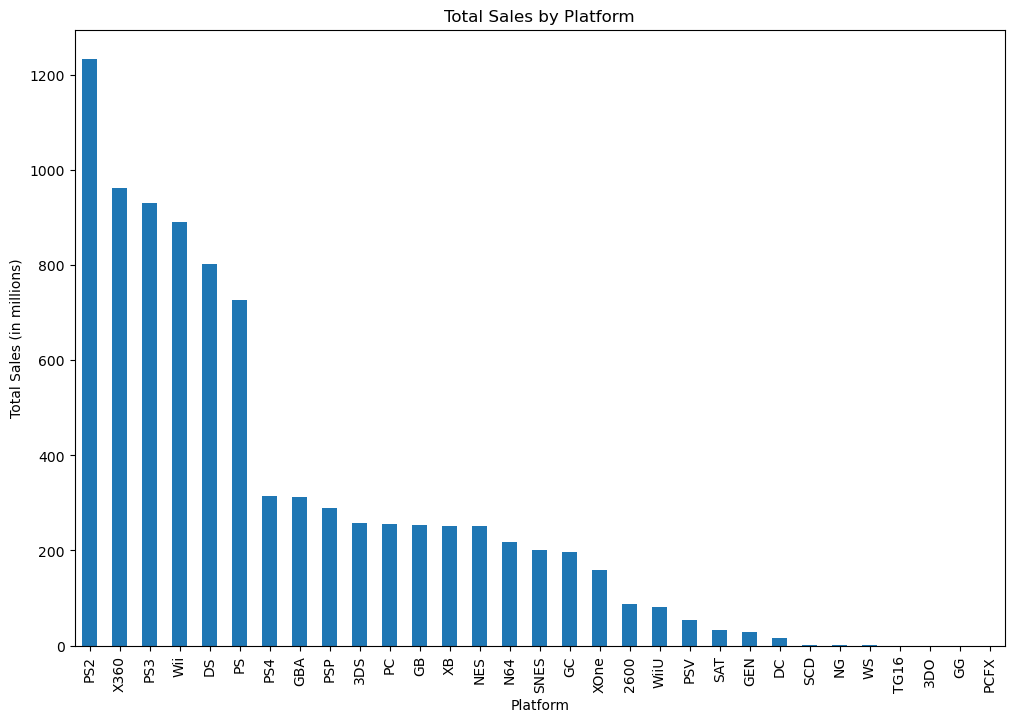

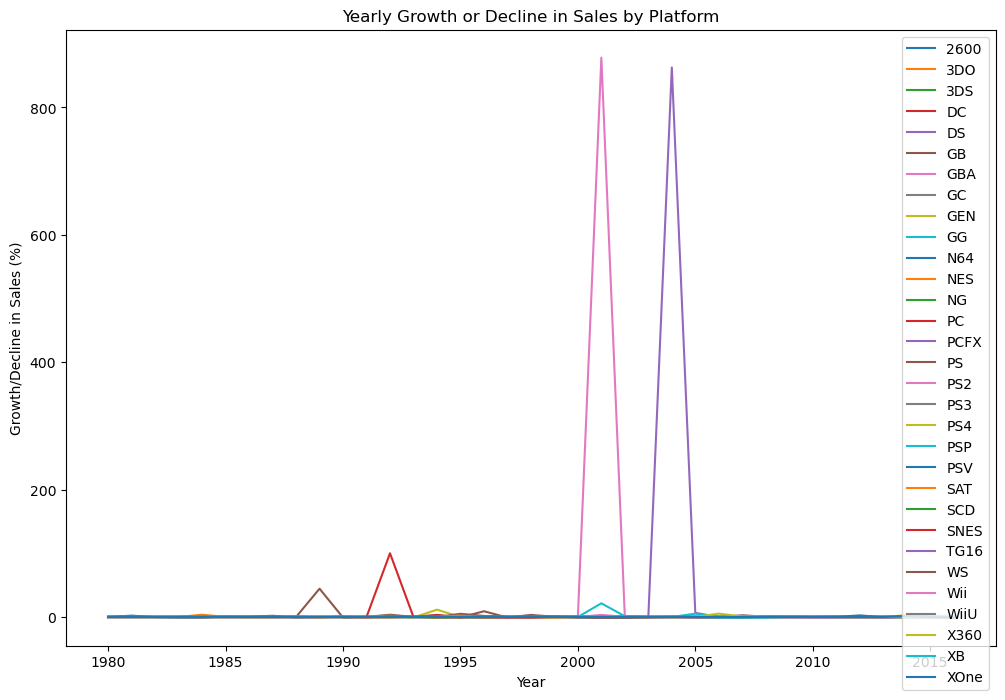

Potentially profitable platforms: ['PS4', 'XOne']


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Group by platform and sum total_sales
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Plot the total sales for each platform
plt.figure(figsize=(12, 8))
platform_sales.plot(kind='bar')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.show()

# Calculate yearly sales for each platform
yearly_platform_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Determine growth or decline by comparing sales in consecutive years
growth_decline = yearly_platform_sales.pct_change().fillna(0)

# Plot the growth or decline for each platform
plt.figure(figsize=(12, 8))
for platform in yearly_platform_sales.columns:
    plt.plot(growth_decline.index, growth_decline[platform], label=platform)

plt.title('Yearly Growth or Decline in Sales by Platform')
plt.xlabel('Year')
plt.ylabel('Growth/Decline in Sales (%)')
plt.legend(loc='best')
plt.show()

# Select potentially profitable platforms
# Define profitability criteria, e.g., platforms with sales growth over the last few years
profitable_platforms = growth_decline.columns[growth_decline.iloc[-3:].mean() > 0]
print("Potentially profitable platforms:", profitable_platforms.tolist())


Global sales of all games, broken down by platform. 

The next boxplot shows the differences in sales. Are they significant? What happens with the average sales across various platforms? Describe your findings.

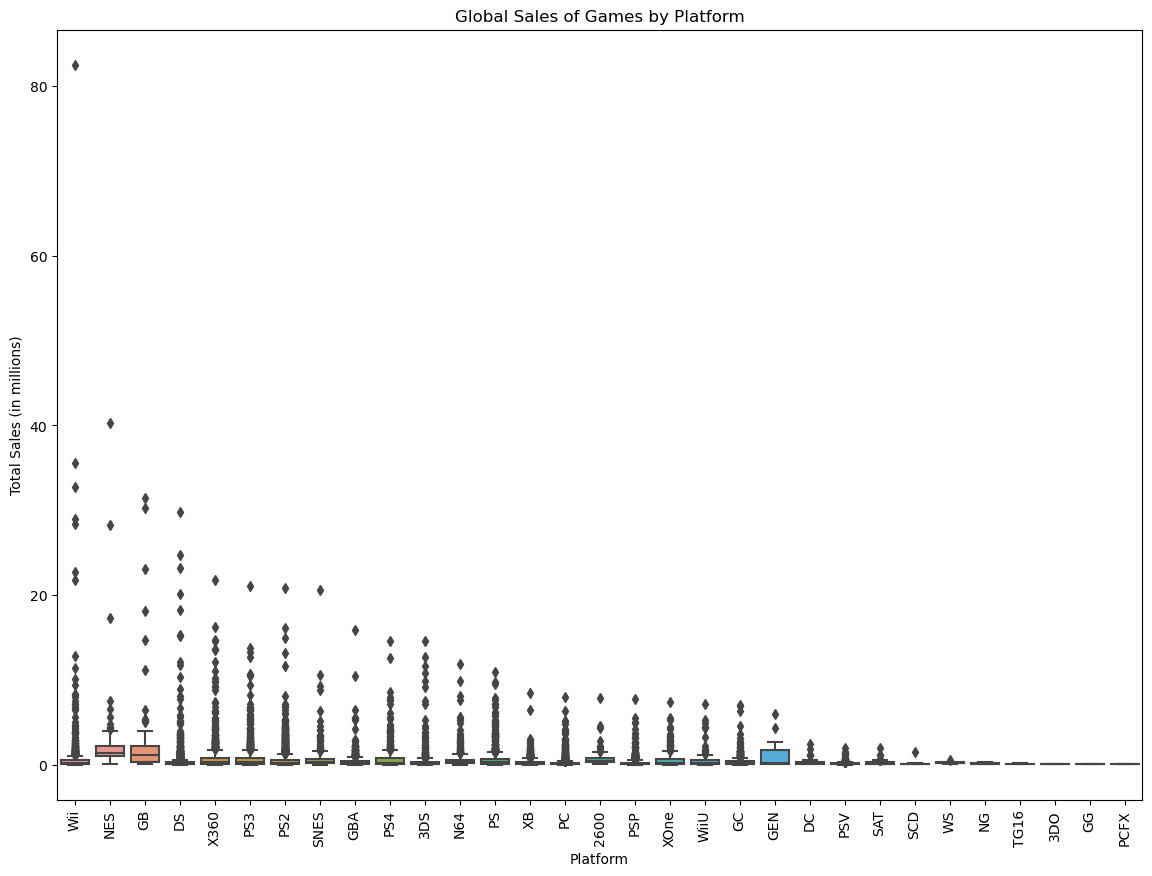

Average sales across various platforms:
platform
GB      2.622990
NES     2.561735
GEN     1.050000
SNES    0.836987
PS4     0.801378
X360    0.780227
2600    0.745517
PS3     0.713124
Wii     0.692986
N64     0.689905
XOne    0.645020
PS      0.611412
PS2     0.579953
WiiU    0.559116
3DS     0.503535
GBA     0.385795
DS      0.378491
GC      0.362970
XB      0.313288
SCD     0.310000
DC      0.306731
PC      0.267252
PSP     0.242691
WS      0.236667
SAT     0.194162
PSV     0.125431
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64
Platform: GB, Average Sales: 2.62 million
Platform: NES, Average Sales: 2.56 million
Platform: GEN, Average Sales: 1.05 million
Platform: SNES, Average Sales: 0.84 million
Platform: PS4, Average Sales: 0.80 million
Platform: X360, Average Sales: 0.78 million
Platform: 2600, Average Sales: 0.75 million
Platform: PS3, Average Sales: 0.71 million
Platform: Wii, Average Sales: 0.69 million
P

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# Create a box plot for global sales by platform
plt.figure(figsize=(14, 10))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

# Calculate the average sales for each platform
average_sales = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average sales across various platforms:")
print(average_sales)

# Describe findings
for platform, avg_sales in average_sales.items():
    print(f"Platform: {platform}, Average Sales: {avg_sales:.2f} million")

# Additional analysis (optional)
# Conduct a statistical test (ANOVA) to see if differences in sales are significant
import scipy.stats as stats

# Filter out platforms with insufficient data
platform_sales_data = [df[df['platform'] == platform]['total_sales'] for platform in df['platform'].unique() if len(df[df['platform'] == platform]) > 10]

# Perform ANOVA
f_val, p_val = stats.f_oneway(*platform_sales_data)
print(f"ANOVA F-value: {f_val:.2f}, p-value: {p_val:.5f}")
if p_val < 0.05:
    print("The differences in sales between platforms are statistically significant.")
else:
    print("The differences in sales between platforms are not statistically significant.")


### User Reviews

Observe how user and critic reviews affect the sales of a popular platform (your choice). Create a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

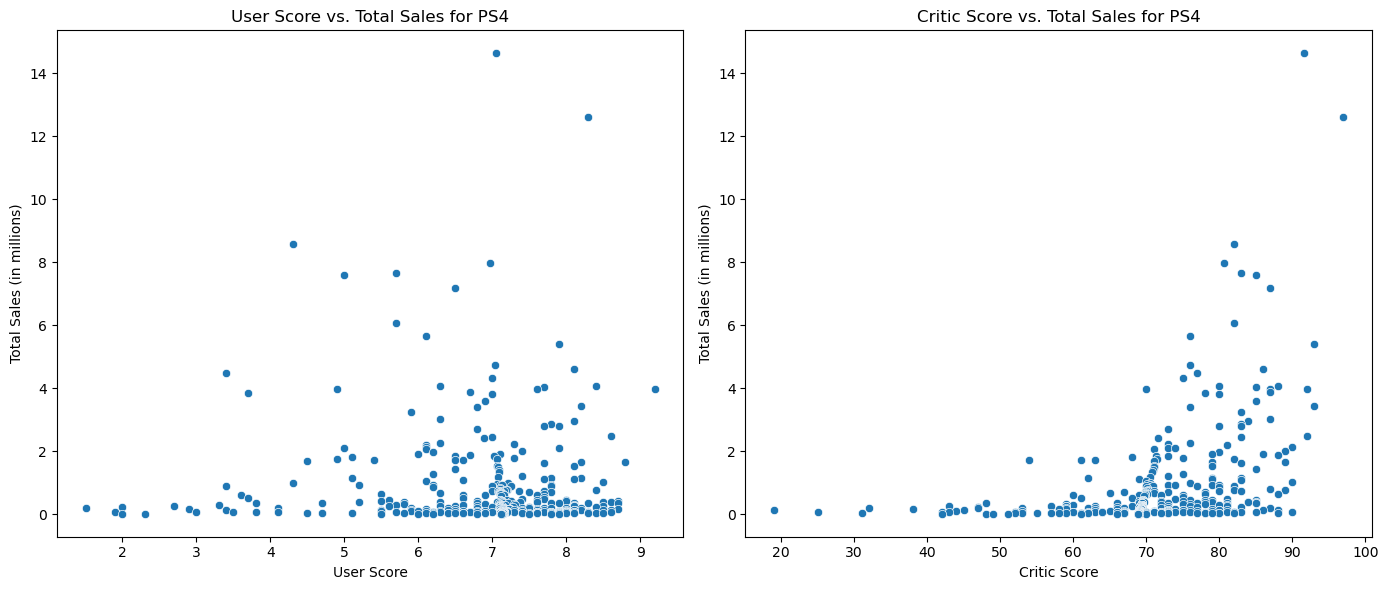

Correlation between user score and total sales for PS4: -0.05
Correlation between critic score and total sales for PS4: 0.42
Critic scores have a stronger correlation with total sales than user scores.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# Choose a popular platform, e.g., 'PS4'
platform = 'PS4'

# Filter data for the chosen platform
platform_df = df[df['platform'] == platform]

# Create scatter plots for user score vs. total sales and critic score vs. total sales
plt.figure(figsize=(14, 6))

# Scatter plot for user score vs. total sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=platform_df)
plt.title(f'User Score vs. Total Sales for {platform}')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot for critic score vs. total sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_df)
plt.title(f'Critic Score vs. Total Sales for {platform}')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlations
user_score_correlation = platform_df['user_score'].corr(platform_df['total_sales'])
critic_score_correlation = platform_df['critic_score'].corr(platform_df['total_sales'])

print(f"Correlation between user score and total sales for {platform}: {user_score_correlation:.2f}")
print(f"Correlation between critic score and total sales for {platform}: {critic_score_correlation:.2f}")

# Draw conclusions
if abs(user_score_correlation) > abs(critic_score_correlation):
    print("User scores have a stronger correlation with total sales than critic scores.")
elif abs(user_score_correlation) < abs(critic_score_correlation):
    print("Critic scores have a stronger correlation with total sales than user scores.")
else:
    print("User scores and critic scores have an equal correlation with total sales.")


### Sales of games in other platforms

Taking your conclusions into account, compare the sales of the same games on other platforms.

platform                                     PS4  XOne
name                                                  
7 Days to Die                               0.14  0.05
Adventure Time: Finn & Jake Investigations  0.10  0.05
Agatha Christie's The ABC Murders           0.02  0.01
Alien: Isolation                            1.12  0.50
Angry Birds Star Wars                       0.22  0.17
...                                          ...   ...
Wolfenstein: The Old Blood                  0.43  0.15
Worms: WMD                                  0.03  0.01
XCOM 2                                      0.14  0.04
ZombiU                                      0.06  0.01
Zombie Army Trilogy                         0.20  0.11

[217 rows x 2 columns]


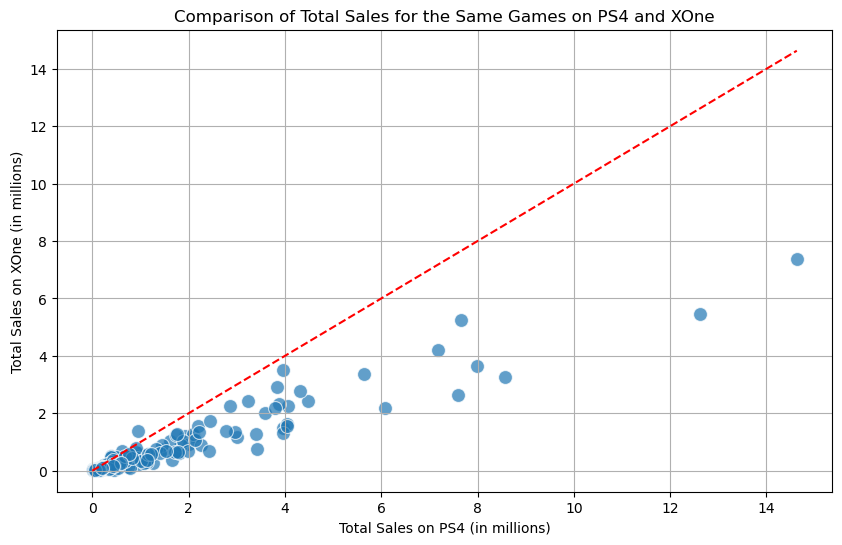

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe and it's already loaded

# Filter the data to include only potentially profitable platforms
potentially_profitable_platforms = ['PS4', 'XOne']

# Filter the data for the same games on these platforms
filtered_df = df[df['platform'].isin(potentially_profitable_platforms)]

# Pivot table to compare sales of the same games across the two platforms
sales_comparison = filtered_df.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).dropna()

# Display the comparison
print(sales_comparison)

# Create a scatter plot to visualize the sales comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_comparison, x='PS4', y='XOne', s=100, alpha=0.7)

# Add a reference line y=x
plt.plot([0, sales_comparison.max().max()], [0, sales_comparison.max().max()], 'r--')

plt.title('Comparison of Total Sales for the Same Games on PS4 and XOne')
plt.xlabel('Total Sales on PS4 (in millions)')
plt.ylabel('Total Sales on XOne (in millions)')
plt.grid(True)
plt.show()



### Normal Distribution of games by genre

Take a look at the overall distribution of games by genre. What can be said about the most profitable genres? Can you generalize about genres with high and low sales?

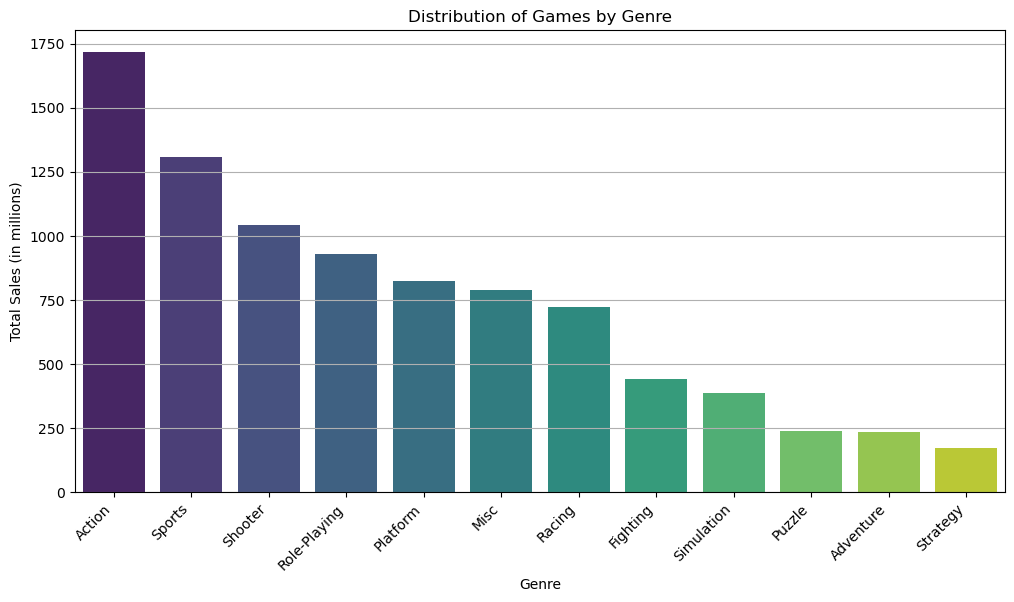

Top 5 Genres by Total Sales:
genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Name: total_sales, dtype: float64

Bottom 5 Genres by Total Sales:
genre
Fighting      442.66
Simulation    387.96
Puzzle        239.89
Adventure     233.33
Strategy      172.57
Name: total_sales, dtype: float64


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe and it's already loaded

# Group the data by genre and calculate total sales for each genre
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot the distribution of games by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Get the top 5 and bottom 5 genres by total sales
top_genres = genre_sales.head(5)
bottom_genres = genre_sales.tail(5)

# Display the top and bottom genres
print("Top 5 Genres by Total Sales:")
print(top_genres)
print("\nBottom 5 Genres by Total Sales:")
print(bottom_genres)


## <b>User Profiles Per Region</b>

We are going to create profiles for each region; North America, Japan and the European Union, in order to analyze variations regarding sales, platforms, genres and scores.

### Top 5 platforms. 

Describe the variations in their market shares from one region to another.

In [29]:
# Importing necessary libraries
import pandas as pd

# Assuming you have a DataFrame called df with columns: platform, na_sales, eu_sales, jp_sales

# Grouping by platform and summing up sales for each region
platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Calculating total sales for each platform
platform_sales['total_sales'] = platform_sales.sum(axis=1)

# Finding the top five platforms for each region
top_platforms_na = platform_sales.nlargest(5, 'na_sales')['na_sales']
top_platforms_eu = platform_sales.nlargest(5, 'eu_sales')['eu_sales']
top_platforms_jp = platform_sales.nlargest(5, 'jp_sales')['jp_sales']

# Calculating market share for each platform in each region
platform_sales['market_share_na'] = platform_sales['na_sales'] / platform_sales['na_sales'].sum()
platform_sales['market_share_eu'] = platform_sales['eu_sales'] / platform_sales['eu_sales'].sum()
platform_sales['market_share_jp'] = platform_sales['jp_sales'] / platform_sales['jp_sales'].sum()

# Displaying the top five platforms and their market shares across regions
print("Top 5 Platforms in North America:")
print(top_platforms_na)
print("\nTop 5 Platforms in Europe:")
print(top_platforms_eu)
print("\nTop 5 Platforms in Japan:")
print(top_platforms_jp)


Top 5 Platforms in North America:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top 5 Platforms in Europe:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Top 5 Platforms in Japan:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


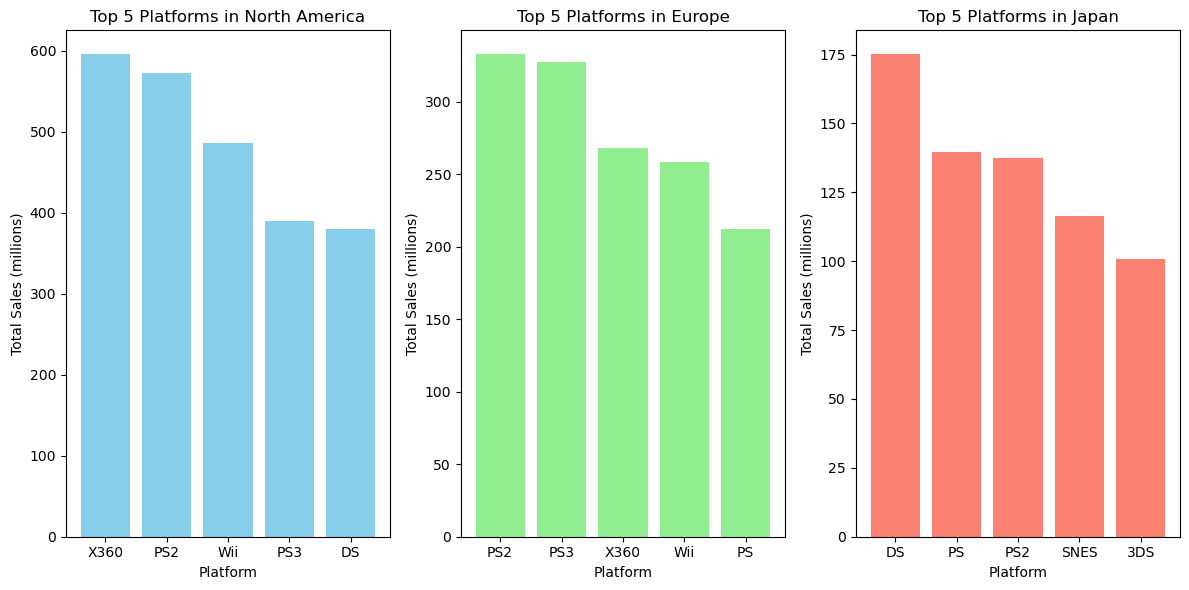

In [30]:
import matplotlib.pyplot as plt

# Results
top_platforms_na = {'X360': 595.74, 'PS2': 572.92, 'Wii': 486.87, 'PS3': 390.13, 'DS': 380.31}
top_platforms_eu = {'PS2': 332.63, 'PS3': 327.21, 'X360': 268.32, 'Wii': 258.32, 'PS': 212.39}
top_platforms_jp = {'DS': 175.02, 'PS': 139.78, 'PS2': 137.54, 'SNES': 116.55, '3DS': 100.62}

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(top_platforms_na.keys(), top_platforms_na.values(), color='skyblue')
plt.title('Top 5 Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

plt.subplot(1, 3, 2)
plt.bar(top_platforms_eu.keys(), top_platforms_eu.values(), color='lightgreen')
plt.title('Top 5 Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

plt.subplot(1, 3, 3)
plt.bar(top_platforms_jp.keys(), top_platforms_jp.values(), color='salmon')
plt.title('Top 5 Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()


### Top 5 Genres

In [31]:
# Top 5 Genres in North America
top_genres_na = df.groupby('genre')['na_sales'].sum().nlargest(5)
print("Top 5 Genres in North America:")
print(top_genres_na)

# Top 5 Genres in Europe
top_genres_eu = df.groupby('genre')['eu_sales'].sum().nlargest(5)
print("\nTop 5 Genres in Europe:")
print(top_genres_eu)

# Top 5 Genres in Japan
top_genres_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5)
print("\nTop 5 Genres in Japan:")
print(top_genres_jp)


Top 5 Genres in North America:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Top 5 Genres in Europe:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Top 5 Genres in Japan:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


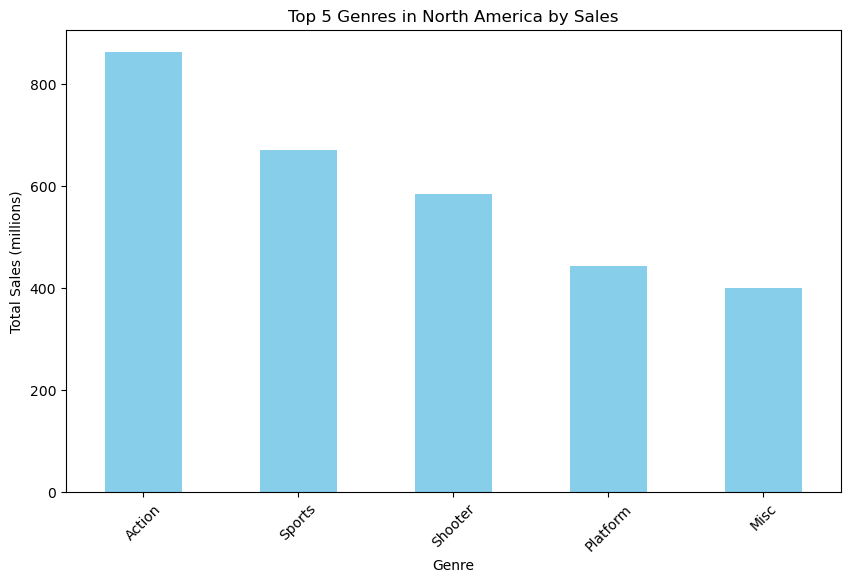

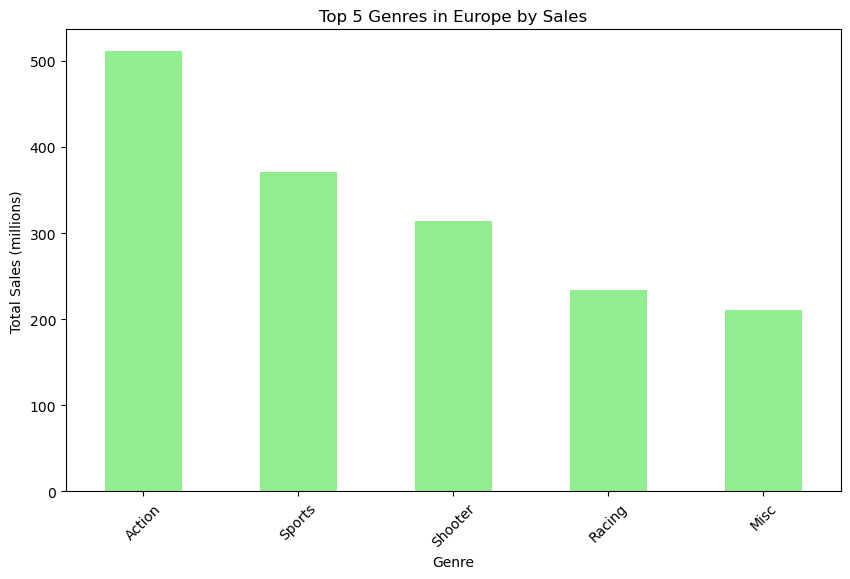

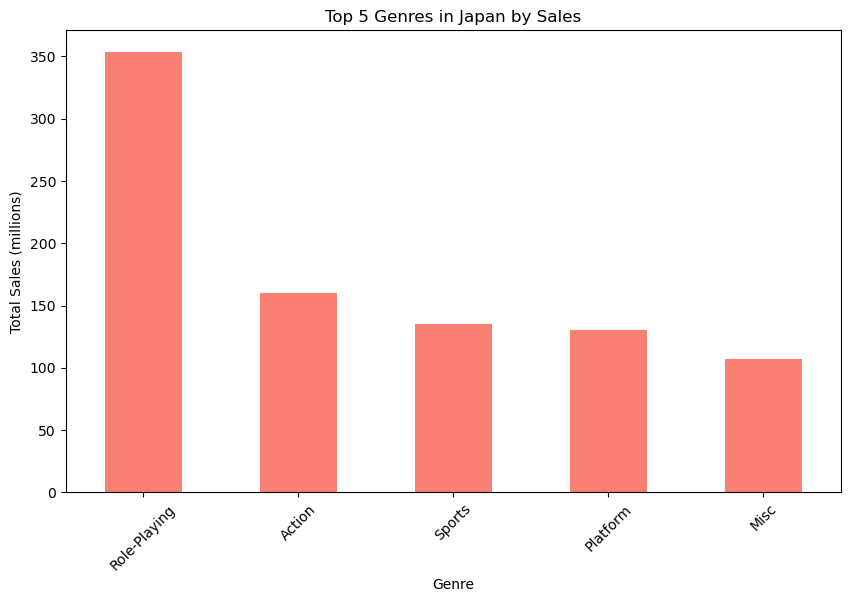

In [32]:
import matplotlib.pyplot as plt

# Top 5 Genres in North America
top_genres_na = df.groupby('genre')['na_sales'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_genres_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 Genres in North America by Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.show()

# Top 5 Genres in Europe
top_genres_eu = df.groupby('genre')['eu_sales'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_genres_eu.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Genres in Europe by Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.show()

# Top 5 Genres in Japan
top_genres_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_genres_jp.plot(kind='bar', color='salmon')
plt.title('Top 5 Genres in Japan by Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.show()


### Ratings Analysis

We are going to verify if the ESRB ratings have an impact in sales from each region

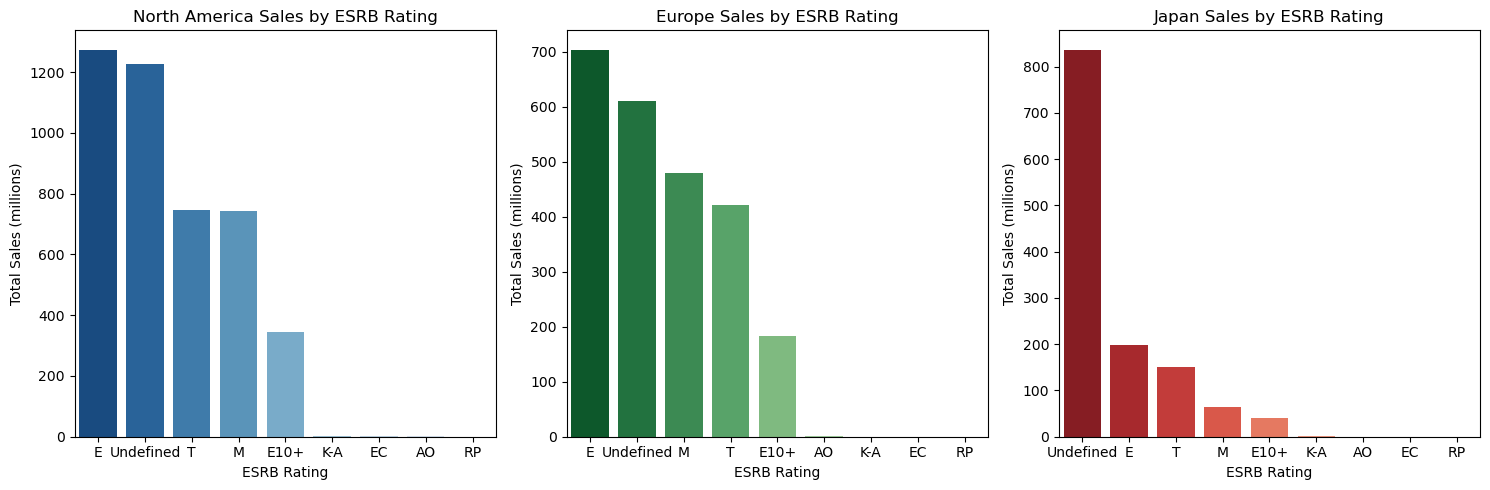

In [33]:
import seaborn as sns

# Create a pivot table to summarize sales by ESRB rating for each region
pivot_table_na = df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
pivot_table_eu = df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
pivot_table_jp = df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

# Plotting
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=pivot_table_na.index, y=pivot_table_na['na_sales'], palette='Blues_r')
plt.title('North America Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (millions)')

plt.subplot(1, 3, 2)
sns.barplot(x=pivot_table_eu.index, y=pivot_table_eu['eu_sales'], palette='Greens_r')
plt.title('Europe Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (millions)')

plt.subplot(1, 3, 3)
sns.barplot(x=pivot_table_jp.index, y=pivot_table_jp['jp_sales'], palette='Reds_r')
plt.title('Japan Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()


In [34]:
print("North America Sales by ESRB Rating:")
print(pivot_table_na)
print('_'*30)
print("Europe Sales by ESRB Rating:")
print(pivot_table_eu)
print('_'*30)
print("Japan Sales by ESRB Rating:")
print(pivot_table_jp)

North America Sales by ESRB Rating:
           na_sales
rating             
E           1274.24
Undefined   1225.84
T            747.60
M            742.89
E10+         345.50
K-A            2.56
EC             1.53
AO             1.26
RP             0.00
______________________________
Europe Sales by ESRB Rating:
           eu_sales
rating             
E            703.87
Undefined    609.65
M            480.00
T            421.79
E10+         183.35
AO             0.61
K-A            0.27
EC             0.11
RP             0.03
______________________________
Japan Sales by ESRB Rating:
           jp_sales
rating             
Undefined    836.74
E            197.96
T            150.70
M             63.58
E10+          40.20
K-A            1.46
AO             0.00
EC             0.00
RP             0.00


## <b>Statistical Hipotheses</b>

In our study on video games, we wanted to explore whether certain factors, like the platform (Xbox One vs. PC) or genre (Action vs. Sports), affect how users rate their gaming experiences. To do this, we formulated two main questions: Are user ratings different between Xbox One and PC? And are they different between Action and Sports games?

To answer these questions, we used a statistical tool called the t-test, which helps us figure out if the differences we see in ratings are real or just random chance. We set a rule beforehand that if the chance of being wrong (called the alpha level) is less than 5%, we'll consider the differences we find to be meaningful.

So, how did we set up the test? For each question, we had a null hypothesis (H0) and an alternative hypothesis (H1). The null hypothesis basically says, "There's no real difference," while the alternative hypothesis suggests, "Yes, there is a difference."

For example, when comparing Xbox One and PC ratings, our null hypothesis was that there's no significant difference in how users rate games on these platforms. Our alternative hypothesis said, "Actually, there is a difference."

After crunching the numbers, we found that the differences we saw in user ratings between Xbox One and PC were so big that they were very unlikely to be due to chance alone. The same goes for our comparison of Action and Sports game ratings.

Using these methods helps us make more informed decisions about which games to develop, which platforms to support, and how to cater to different player preferences. It's all about understanding what gamers like and giving them more of it!

### Why Alpha treshold 0.05

In this study, we've chosen a significance level of 0.05 for hypothesis testing, a common practice in statistical analysis. This decision balances the risk of Type I and Type II errors, ensuring that our conclusions are both reliable and practically relevant. By adhering to this conventional alpha level, our findings align with established practices in video game research, facilitating comparison with existing studies and enhancing the overall coherence of our analysis. This approach offers a robust framework for exploring differences in user ratings and sales across platforms and genres while maintaining a pragmatic balance between statistical rigor and practical applicability.

### T-Test to prove that average user ratings for the Xbox One and PC platforms are the same.

In [35]:
# Extract sample user ratings for Xbox One platform
xbox_one_ratings = df[df['platform'] == 'XOne']['user_score'].dropna()

# Extract sample user ratings for PC platform
pc_ratings = df[df['platform'] == 'PC']['user_score'].dropna()

# Perform t-test
t_statistic, p_value = ttest_ind(xbox_one_ratings, pc_ratings)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level (alpha), so we reject the null hypothesis.")
    print("There is sufficient evidence to conclude that the average user ratings for Xbox One and PC platforms are different.")
else:
    print("The p-value is greater than the significance level (alpha), so we fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the average user ratings for Xbox One and PC platforms are the same.")

T-Statistic: -4.127014757515185
P-Value: 3.928384825810199e-05
The p-value is less than the significance level (alpha), so we reject the null hypothesis.
There is sufficient evidence to conclude that the average user ratings for Xbox One and PC platforms are different.


### T-Test to prove that average user ratings for the Action and Sports genres are different.

In [36]:
# Extract sample user ratings for Action genre
action_ratings = df[df['genre'] == 'Action']['user_score'].dropna()

# Extract sample user ratings for Sports genre
sports_ratings = df[df['genre'] == 'Sports']['user_score'].dropna()

# Perform t-test
t_statistic, p_value = ttest_ind(action_ratings, sports_ratings)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level (alpha), so we reject the null hypothesis.")
    print("There is sufficient evidence to conclude that the average user ratings for Action and Sports genres are different.")
else:
    print("The p-value is greater than the significance level (alpha), so we fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the average user ratings for Action and Sports genres are different.")

T-statistic: 1.2021387153400094
P-value: 0.22936051915686273
The p-value is greater than the significance level (alpha), so we fail to reject the null hypothesis.
There is not enough evidence to conclude that the average user ratings for Action and Sports genres are different.


## <b>CONCLUSION</b>